# Data Aggregation and Group Operations II

Today, we will continue our coverage of data aggregation and group operations, which includes:

* Data Transformation for Groups
* Pivot Tables and Cross Tabulations

Friendly Reminders:

* Project update, due by April 3 at 11:59 p.m.

In [13]:
#%pylab inline # automatically imports numpy as np, matplotlib.pyplot as plt, and allows inline visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Transformation for Groups

We have already covered data aggregation for grouped data, which is one form of function application that produces a (typically numerical) scalar value for each group and includes methods such as:

* Optimized aggregation methods (.count, .mean, etc.)
* Non-optimized aggregation methods (.describe, .value_counts)
* .aggregate, .agg methods

However, not all relevant function applications are aggregation operations. Data transformation operations do not return aggregate statistics, and therefore are not compatible with the .aggregate/.agg methods. For these cases, pandas offers the .apply method for GroupBy objects, which applies a given function to each group.

Note that the .apply method for GroupBy objects is distinct from the .apply method for Series and DataFrame objects that applies a function (or functions) to an entire axis (i.e., Series, DataFrame row or column). All .apply methods are flexible, and can accept either aggregation functions or transformation functions (or both). These methods are distinct still from methods that apply functions element-wise (e.g., Series .map, DataFrame .applymap).

Our focus today is on applying transformation operations to GroupBy objects, but we will review some of these related techniques for extra practice.

In [14]:
# Import tips data
path = '/Users/chenchuqiao/Downloads/'
df = pd.read_csv(path + 'tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Suppose we wanted to calculate the tip percentage for each bill. We could use a standard (vectorized) technique:

In [15]:
df['tip_pct'] = 100 * df['tip'] / df['total_bill']
df['tip_pct'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_pct, dtype: float64

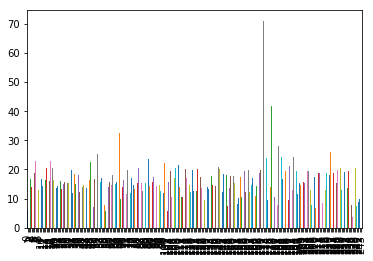

In [11]:
df['tip_pct'].plot(kind='bar')

In [18]:
# Compare to Series .apply method - Aggregation Functions
df['tip_pct'].apply([len, np.mean, np.std, np.amin, np.amax]).rename(index={'len':'count', 'amax':'max', 'amin':'min'})

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
max       71.034483
Name: tip_pct, dtype: float64

In [19]:
# Compare to Series .apply method - Transformation Functions
df['tip'].apply([np.floor, np.square, np.log]).head()

,floor,square,log
0,1.0,1.0201,0.009950
1,1.0,2.7556,0.506818
2,3.0,12.2500,1.252763
3,3.0,10.9561,1.196948
4,3.0,13.0321,1.283708


In [21]:
df['tip'].head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [25]:
df['tip'].round().head()

0    1.0
1    2.0
2    4.0
3    3.0
4    4.0
Name: tip, dtype: float64

In [20]:
# Compare to Series .map method - Element-wise Function Appliction
df['tip'].map(lambda t: '$' + '%.2f' % t).head()

0    $1.01
1    $1.66
2    $3.50
3    $3.31
4    $3.61
Name: tip, dtype: object

Just for kicks, let's calculate the proportion of even-dollar tips. We can take advantage of Boolean arrays for this task, as summing them gives us the frequency of the True condition, which we can divide by the length of the DataFrame to convert to a proportion.

In [23]:
# Rounding approach
(df['tip'] == df['tip'].round()).sum() / len(df)

0.34836065573770492

In [27]:
a = lambda t: '%.2f' % t#make it .00 two decimal points
a(1.6)

'1.60'

In [22]:
# Or, use regular expressions#.str before you slice it
df['tip'].map(lambda t: '%.2f' % t).str.contains('\.00').sum() / len(df)

0.34836065573770492

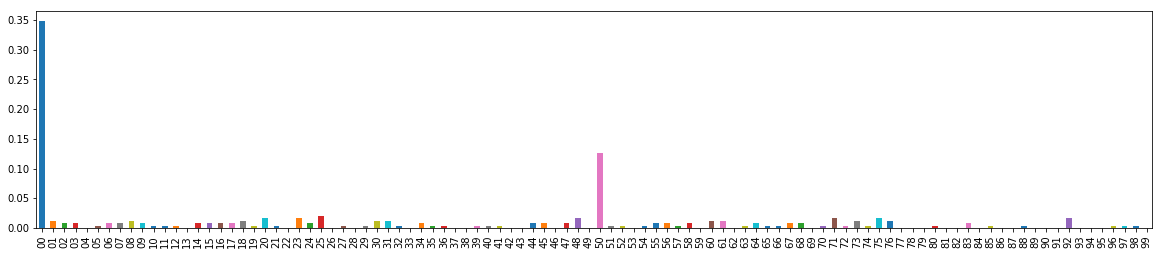

In [29]:
# Compute frequency of tip cents
n = len(df) # number of observations in the data, pre-compute rather than compute within loop
D = {}#lets calculate all the digit ending nums 
for i in range(100):
    cents = str(i).zfill(2) # zfill: Adds leading zero for single-digit cents
    D[cents] = df['tip'].map(lambda t: '%.2f' % t).str.contains('\.' + cents).sum() / n
tip_freq = pd.Series(D)
tip_freq.plot(kind='bar', figsize=(20,4))

Aside from the \$.00 and \$.50 cases, why is there so much variation in the tip in cents??
#it seems that people like rounding on the final bill

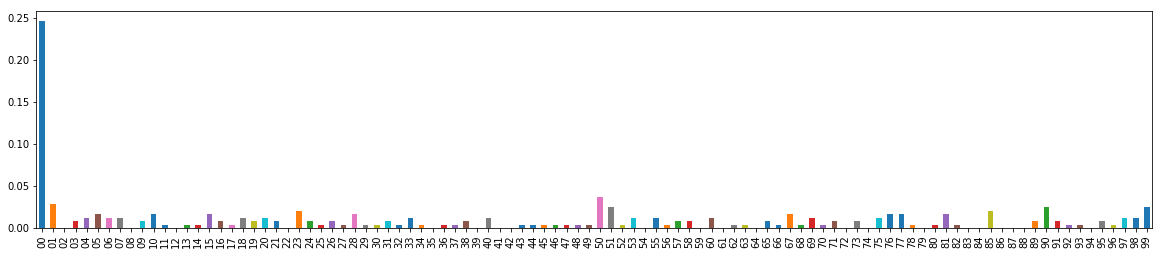

In [38]:
# Compute frequency of tip cents
n = len(df) # number of observations in the data, pre-compute rather than compute within loop
D = {}#lets calculate all the digit ending nums 
for i in range(100):
    cents = str(i).zfill(2) # zfill: Adds leading zero for single-digit cents
    D[cents] = (df['total_bill']+df['tip']).map(lambda t: '%.2f' % t).str.contains('\.' + cents).sum()/ n
tip_freq = pd.Series(D)
tip_freq.plot(kind='bar', figsize=(20,4))

### 5-Minute Activity

Analyze the tips data to develop an assessment of customer tendencies in determining the amount to tip.

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [35]:
from sklearn import linear_model
#clf = tree.DecisionTreeClassifier() 
regr = linear_model.LinearRegression()

In [34]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
tip_pct       244 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.3+ KB


In [36]:
X,Y = df[['total_bill','sex','smoker','day','time','size']],df['tip']
regr = regr.fit(X, Y)

ValueError: could not convert string to float: 'Dinner'

### OK, back to group operations and data transformation...

Now, suppose we wanted to analyze the tip percentage of each bill, as a function of the day of the week. We can use our newly developed .groupby operations and data aggregation skills!

In [40]:
day_order = ['Thur','Fri','Sat','Sun'] # How may this be useful?

In [57]:
# Method 1 - Perform the groupby operation on the entire data frame, then select the tip_pct column
df.groupby(by='day')['tip_pct'].describe().loc[day_order]

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,16.127563,3.865182,7.296137,13.820958,15.384615,19.268675,26.631158
Fri,19.0,16.991303,4.766531,10.355540,13.373871,15.562472,19.663729,26.348039
Sat,87.0,15.315172,5.129259,3.563814,12.386329,15.183246,18.827082,32.573290
Sun,76.0,16.689729,8.473889,5.944673,11.998208,16.110332,18.788908,71.034483


In [59]:
# Method 2 - Perform the groupby operation directly on the tip_pct column (Series)
df['tip_pct'].groupby(by=df['day']).describe().loc[day_order]

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,16.127563,3.865182,7.296137,13.820958,15.384615,19.268675,26.631158
Fri,19.0,16.991303,4.766531,10.355540,13.373871,15.562472,19.663729,26.348039
Sat,87.0,15.315172,5.129259,3.563814,12.386329,15.183246,18.827082,32.573290
Sun,76.0,16.689729,8.473889,5.944673,11.998208,16.110332,18.788908,71.034483


Let's dig into the details about the bills with the largest tips (by percentage). Let's define a function that will help us select the *n* bills with the highest tip percentage.

In [46]:
def top(frame, n=5, column='tip_pct'):
    return frame.sort_values(by=column, ascending=False).head(n)

In [60]:
# Report top 5 bills according to tip_pct
top(df)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


In [61]:
# Report top 10 bills according to the bill total
top(df, n=2, column='total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.0,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.0,Male,No,Sat,Dinner,4,18.621974


Now, let's apply our top function to some GroupBy objects:

In [62]:
# Highest tip_pct for each day
df.groupby(by='day').apply(top, n=1) # .apply method accepts *args and **kwargs

,,total_bill,tip,sex,smoker,day,time,size,tip_pct
day,,,,,,,,,
Fri,93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
Sat,67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
Sun,172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
Thur,149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158


In [63]:
# Drop index values and re-order#drop make sure the index did not turn into columns
df.groupby(by='day').apply(top, n=1).reset_index(1, drop=True).loc[day_order]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
day,,,,,,,,
Thur,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
Fri,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
Sat,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
Sun,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483


In [64]:
# Highest total_bill by time of day
df.groupby(by='time').apply(top, column='total_bill').reset_index(1, drop=True).loc[['Lunch','Dinner']]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
time,,,,,,,,
Lunch,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237
Lunch,41.19,5.00,Male,No,Thur,Lunch,5,12.138869
Lunch,34.83,5.17,Female,No,Thur,Lunch,4,14.843526
Lunch,34.30,6.70,Male,No,Thur,Lunch,6,19.533528
Lunch,32.68,5.00,Male,Yes,Thur,Lunch,2,15.299878
Dinner,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
Dinner,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
Dinner,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
Dinner,48.17,5.00,Male,No,Sun,Dinner,6,10.379905


Now, suppose we want to analyze the relationship between some of the other factors and tip_pct.

In [65]:
df['tip_pct'].groupby(by=df['sex']).mean()#these are eda approachese

sex
Female    16.649074
Male      15.765055
Name: tip_pct, dtype: float64

In [66]:
df['tip_pct'].groupby(by=df['day']).mean()

day
Fri     16.991303
Sat     15.315172
Sun     16.689729
Thur    16.127563
Name: tip_pct, dtype: float64

In [67]:
df['tip_pct'].groupby(by=df['time']).mean()

time
Dinner    15.951779
Lunch     16.412793
Name: tip_pct, dtype: float64

In [68]:
df.groupby(by=['day','time'])['tip_pct'].mean()

day   time  
Fri   Dinner    15.891611
      Lunch     18.876489
Sat   Dinner    15.315172
Sun   Dinner    16.689729
Thur  Dinner    15.974441
      Lunch     16.130074
Name: tip_pct, dtype: float64

### Quick Review

How could we reshape the previous result so that it is easier to view the results?

In [70]:
df.groupby(by=['day','time'])['tip_pct'].mean().unstack()#make it unstack and looks like a table

time,Dinner,Lunch
day,,
Fri,15.891611,18.876489
Sat,15.315172,NaN
Sun,16.689729,NaN
Thur,15.974441,16.130074


### OK, let's resume...

Perhaps the relationship between one factor and tip_pct depends on another factor...

In [71]:
df['total_bill'].corr(df['tip_pct'])

-0.33862408496473478

In [77]:
df['tip_pct'].head()

0     5.944673
1    16.054159
2    16.658734
3    13.978041
4    14.680765
Name: tip_pct, dtype: float64

In [84]:
#why this work??
df.groupby(by='day')[['total_bill','tip','size']].apply(lambda g: g.corrwith(df['tip_pct'])).loc[day_order]

,total_bill,tip,size
day,,,
Thur,-0.267903,0.300406,-0.085624
Fri,-0.478875,0.152047,-0.288477
Sat,-0.286110,0.389373,-0.197667
Sun,-0.430747,0.401011,-0.159900


In [75]:
#transformation: map: seriese
#apply: more flexible allow for map
#apply can be used for both agg and map

### Pivot Tables and Cross Tabulations

An alternative approach to applying GroupBy aggregation functions is available in the form of the .pivot_table method (also available as pd.pivot_table), which is similar to the Pivot Table functionality in Excel. Essentially, pivot tables in Python are a combination of GroupBy operations, data aggregation, reshaping, and possibly hierarchical indexing all combined into a single feature (method) for convenience.

Let's revisit our analysis of tip_pct as a function of day of the week and time of the day:

In [78]:
# GroupBy approach
df.groupby(by=['day','time'])['tip_pct'].mean().unstack()

time,Dinner,Lunch
day,,
Fri,15.891611,18.876489
Sat,15.315172,NaN
Sun,16.689729,NaN
Thur,15.974441,16.130074


In [79]:
# Pivot table approach
df.pivot_table(values='tip_pct', index='day', columns='time', aggfunc='mean')

time,Dinner,Lunch
day,,
Fri,15.891611,18.876489
Sat,15.315172,NaN
Sun,16.689729,NaN
Thur,15.974441,16.130074


In [80]:
# Adding margins to pivot table
df.pivot_table(values='tip_pct', index='day', columns='time', aggfunc='mean', margins=True)

time,Dinner,Lunch,All
day,,,
Fri,15.891611,18.876489,16.991303
Sat,15.315172,NaN,15.315172
Sun,16.689729,NaN,16.689729
Thur,15.974441,16.130074,16.127563
All,15.951779,16.412793,16.080258


In [81]:
# Including multiple sets of values to pivot table
df.pivot_table(values=['total_bill','tip','size','tip_pct'], index=['day','time'], aggfunc='mean', margins=True)

size       tip    tip_pct  total_bill
day  time                                             
Fri  Dinner  2.166667  2.940000  15.891611   19.663333
     Lunch   2.000000  2.382857  18.876489   12.845714
Sat  Dinner  2.517241  2.993103  15.315172   20.441379
Sun  Dinner  2.842105  3.255132  16.689729   21.410000
Thur Dinner  2.000000  3.000000  15.974441   18.780000
     Lunch   2.459016  2.767705  16.130074   17.664754
All          2.569672  2.998279  16.080258   19.785943

In [82]:
# Including multiple sets of values and aggregation functions to pivot table
df.pivot_table(values=['total_bill','tip','size','tip_pct'], index=['day','time'], aggfunc=[np.mean,np.amax], margins=True)

mean                                 amax                    \
                 size       tip    tip_pct total_bill size    tip    tip_pct   
day  time                                                                      
Fri  Dinner  2.166667  2.940000  15.891611  19.663333    4   4.73  26.348039   
     Lunch   2.000000  2.382857  18.876489  12.845714    3   3.48  25.931446   
Sat  Dinner  2.517241  2.993103  15.315172  20.441379    5  10.00  32.573290   
Sun  Dinner  2.842105  3.255132  16.689729  21.410000    6   6.50  71.034483   
Thur Dinner  2.000000  3.000000  15.974441  18.780000    2   3.00  15.974441   
     Lunch   2.459016  2.767705  16.130074  17.664754    6   6.70  26.631158   
All          2.569672  2.998279  16.080258  19.785943    6  10.00  71.034483   

                        
            total_bill  
day  time               
Fri  Dinner      40.17  
     Lunch       16.27  
Sat  Dinner      50.81  
Sun  Dinner      48.17  
Thur Dinner      18.78  
     Lunch       43.11  
All              50.81

A cross tabulation (or crosstab for short) is just a special case of a pivot table, for which the aggregation function is count (by default). The pd.crosstab method is more flexible than this specific case, but in general, the pivot table method should suffice for similar types of analysis.

In [83]:
# Count frequency of bills as a function of day and time
pd.crosstab(index=df.day, columns=df.time, margins=True)

time,Dinner,Lunch,All
day,,,
Fri,12,7,19
Sat,87,0,87
Sun,76,0,76
Thur,1,61,62
All,176,68,244


## Next Time: Time Series Data